In [ ]:
!rm -rf * .* 2>/dev/null
!rm -rf ~/.kaggle && mkdir ~/.kaggle
!echo eyJ1c2VybmFtZSI6InB2dHNlYzB4MSIsImtleSI6IjZlOTYxZmMxYjdhYzU2OTlmNzcwYmFjMjI1NTk4MWIwIn0= | base64 -d > ~/.kaggle/kaggle.json
!git clone https://github.com/Reshmavineesh/SunLit-Segmentation .
%cd SegNet
!./download_dataset.sh
from IPython.display import clear_output; clear_output()
print("Dataset ready")

In [ ]:
from src import utils
import tensorflow as tf

image_path = 'dataset/dataset_pistachio_128/color_images/'
mask_path = 'dataset/dataset_pistachio_128/masks/'
n_train = 6500
n_test = 500

train_images, train_masks, test_images, test_masks = utils.load_dataset(image_path, mask_path, n_train, n_test)
print(f"Train Images:\t{train_images.shape}")
print(f"Train Masks:\t{train_masks.shape}")
print(f"Test Images:\t{test_images.shape}")
print(f"Test Masks:\t{test_masks.shape}")

In [3]:
from src.segnet import SegNet
from tensorflow.keras.callbacks import EarlyStopping


EPOCHS = 300
LEARNING_RATE = 1e-4
BATCH_SIZE = 12
early_stopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
loss=utils.binary_cross_entropy
metrics = ['accuracy']
input_shape = train_images.shape[1:]

train_attr = {
    "lr": LEARNING_RATE,
    "batch_size": BATCH_SIZE,
    "optimizer": optimizer.get_config()['name'],
    "loss_fn": loss.get_config()['name']
}

model = SegNet(input_shape)
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history = model.fit(train_images,
                    train_masks,
                    validation_split = 0.25,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    callbacks=[early_stopper])

407/407 [==============================] - 81s 200ms/step - loss: 0.1727 - accuracy: 0.9677 - val_loss: 0.3296 - val_accuracy: 0.8941
Epoch 33/300
407/407 [==============================] - 81s 200ms/step - loss: 0.1675 - accuracy: 0.9679 - val_loss: 0.3487 - val_accuracy: 0.8871
Epoch 34/300
407/407 [==============================] - 82s 201ms/step - loss: 0.1636 - accuracy: 0.9678 - val_loss: 0.3332 - val_accuracy: 0.8912
Epoch 35/300
407/407 [==============================] - 82s 201ms/step - loss: 0.1555 - accuracy: 0.9695 - val_loss: 0.3217 - val_accuracy: 0.8944
Epoch 36/300
407/407 [==============================] - 81s 200ms/step - loss: 0.1503 - accuracy: 0.9703 - val_loss: 0.3284 - val_accuracy: 0.8931
Epoch 37/300
407/407 [==============================] - 82s 201ms/step - loss: 0.1449 - accuracy: 0.9708 - val_loss: 0.3177 - val_accuracy: 0.8943
Epoch 38/300
407/407 [==============================] - 82s 201ms/step - loss: 0.1406 - accuracy: 0.9711 - val_loss: 0.3188 - val_a

1/1 [==============================] - 0s 34ms/step


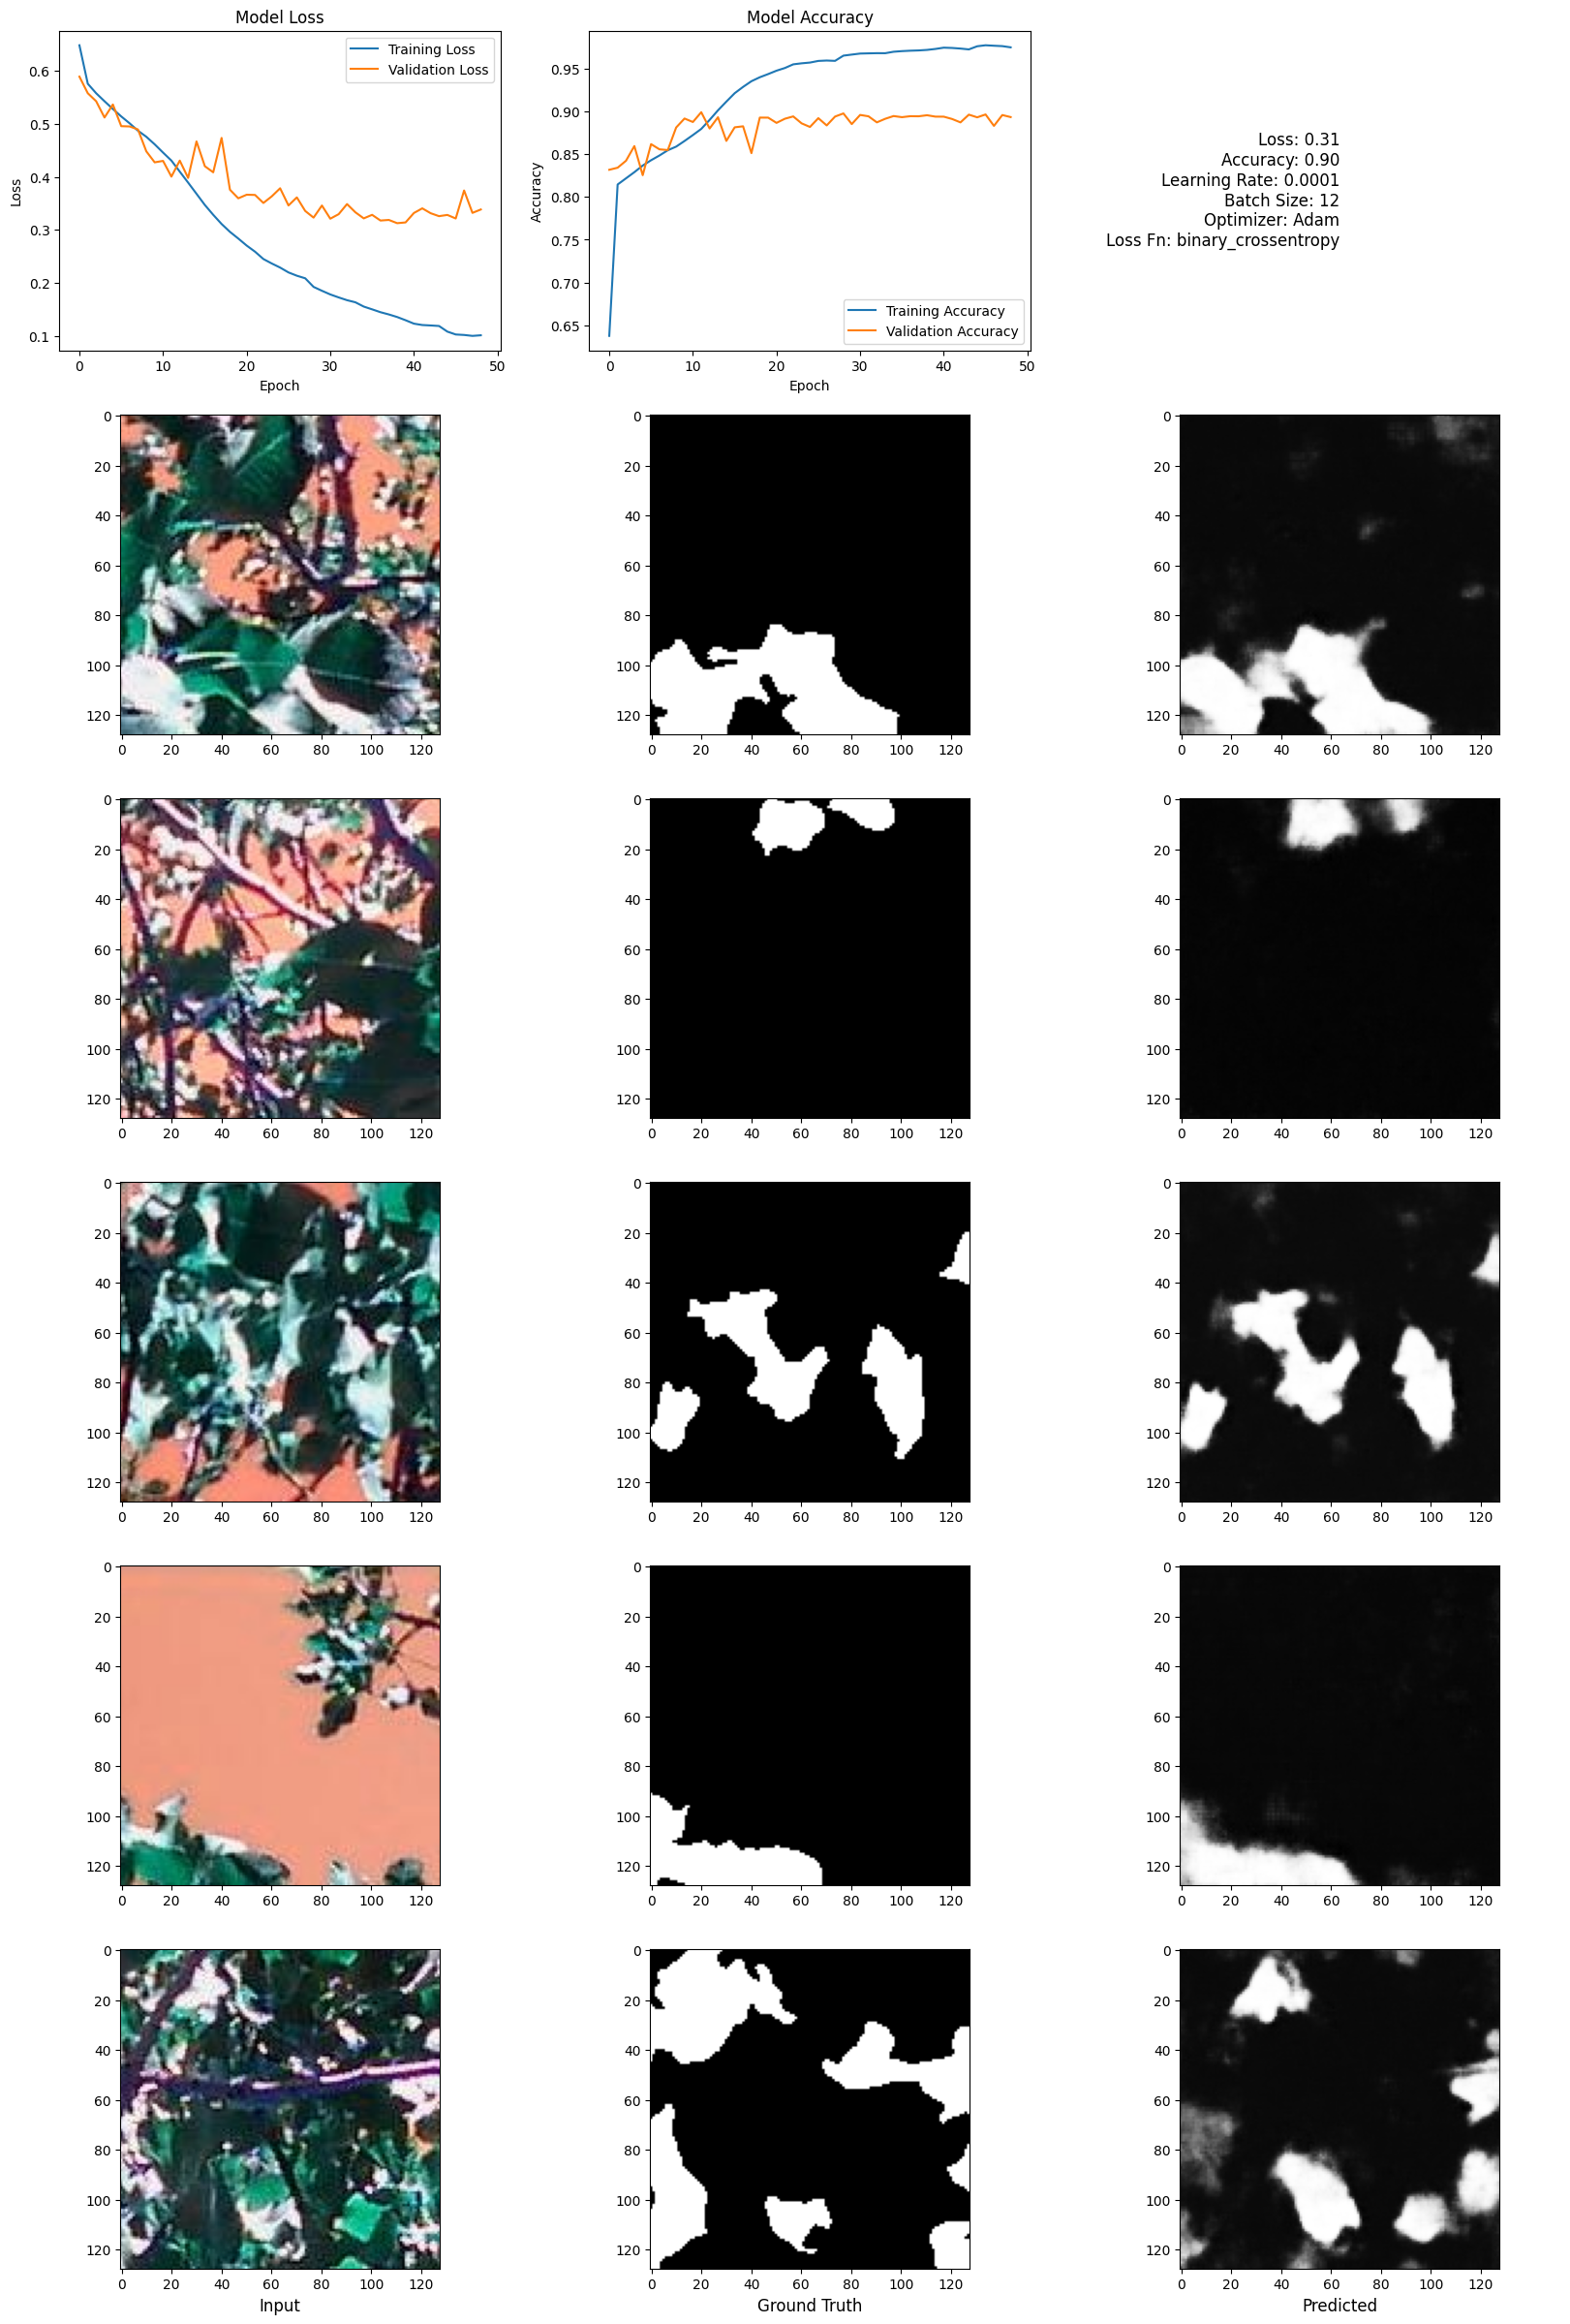

In [4]:
from src.utils import analyzer

analyzer(history, model, image_path, mask_path, test_images, test_masks, train_attr)